# Task
Collect, Explore, Pre-process and Transform Healthcare Data based on specific disease database to be imported from available libraries. consider dummy data, model selection, building and evaluation and also visualise the predictions and results, also use shap for XAI interpretation and also visualise its plots and results.

## Load data

### Subtask:
Load a sample healthcare dataset. Since no specific dataset is provided, I will generate a dummy dataset for demonstration purposes.


**Reasoning**:
Generate a dummy healthcare dataset using `make_classification`, convert it to a pandas DataFrame, and display its head and info.



In [1]:
import pandas as pd
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_clusters_per_class=2, flip_y=0.05, random_state=42)

# Convert to pandas DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Display the first few rows and info
display(df.head())
df.info()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,4.265400,-1.211650,0.796833,-0.109760,1.023434,-5.027231,-1.557087,3.771403,2.699267,0.632583,...,-2.269077,-6.145041,1.389293,-1.530884,-5.510158,-2.477942,-1.710175,1.953010,-1.242872,1
1,-1.744360,-1.308024,0.016525,0.945558,-0.757136,-4.747500,-1.428132,3.415792,-3.069724,-1.041453,...,0.548463,2.828816,-1.045195,-2.633928,3.608559,-0.915549,-0.390394,-2.686359,1.003366,0
2,1.561765,0.177521,-1.176465,1.562136,0.644545,-0.582877,0.100491,0.735118,0.391302,1.111953,...,-0.127159,0.741387,-1.435616,1.012254,-0.758513,-3.227830,0.577517,-0.155184,1.104478,0
3,1.306412,-0.550288,-0.761044,1.781720,-0.168626,-0.304995,0.705352,-2.972645,-2.632262,0.482713,...,-0.852573,3.227455,-0.595030,3.727947,-1.445978,-0.417116,-0.001515,0.931035,-0.413531,0
4,-7.352023,-0.834095,-0.303287,-1.766299,-1.260002,-1.519496,-3.811640,-0.896968,0.671243,-1.218176,...,-0.630232,3.368208,-1.772144,-2.778019,1.266388,4.327759,0.596081,-3.087178,0.396320,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  feature_15  1000 non-null   float64
 16  feature_16  1000 non-null   float64
 17  feature_17  1000 non-null   float64
 18  feature_18  1000 non-null   float64
 19  feature_19  1000 non-null   

## Explore data

### Subtask:
Perform exploratory data analysis (EDA) to understand the structure, content, and characteristics of the dataset.


**Reasoning**:
Display the shape of the DataFrame, descriptive statistics, check for missing values, display data types, and display the distribution of the target variable as requested in the instructions for exploratory data analysis.



In [2]:
# 1. Display the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

# 2. Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# 3. Check for missing values and display the count
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Display the data types of each column
print("\nData Types:")
print(df.dtypes)

# 5. Display the distribution of the target variable
print("\nTarget Variable Distribution:")
display(df['target'].value_counts())

Shape of the DataFrame:
(1000, 21)

Descriptive Statistics:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.286774,0.018832,0.020933,-0.011629,0.461165,0.142797,-0.480995,0.053827,-0.477339,0.023751,...,-0.022623,0.502478,-0.518758,0.318615,0.635379,0.336366,0.013416,0.498664,0.025932,0.507000
std,3.659004,2.095132,2.011018,2.174453,1.926458,3.558016,1.879645,2.130360,2.050913,1.011611,...,1.001923,3.681639,2.104034,2.955660,2.185076,3.542104,1.017575,2.010160,0.990602,0.500201
min,-14.060306,-7.030162,-6.184692,-6.817417,-5.708949,-15.224345,-6.227178,-6.865339,-8.705917,-3.375579,...,-3.635200,-13.717683,-7.771723,-9.055589,-6.925613,-11.421566,-3.094289,-7.455322,-3.329504,0.000000
25%,-2.031074,-1.360239,-1.272814,-1.490351,-0.656732,-2.243592,-1.762233,-1.347721,-1.857157,-0.659505,...,-0.724369,-1.983980,-1.842647,-1.612948,-0.820619,-1.861818,-0.659659,-0.855006,-0.590123,0.000000
50%,0.271154,0.125624,0.138819,-0.000744,0.571637,-0.011351,-0.561960,0.092325,-0.423465,0.001733,...,-0.047368,0.640327,-0.537322,0.532299,0.679993,0.302071,0.006404,0.465423,0.043274,1.000000
75%,2.687756,1.410062,1.459672,1.394460,1.808735,2.436021,0.730689,1.517749,1.003092,0.706289,...,0.697493,2.895446,0.823834,2.394011,2.148864,2.679576,0.718129,1.857764,0.650973,1.000000
max,13.935539,8.237993,6.832418,7.889919,7.501492,13.268480,6.903293,7.021821,5.101133,3.428910,...,3.140423,12.694487,6.489389,8.443451,6.390253,11.988010,3.377768,6.365330,3.285724,1.000000



Missing Values:
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
target        0
dtype: int64

Data Types:
feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
target          int64
dtype: object

Target Variable Distribution:


,count
target,
1,507
0,493


## Preprocess data

### Subtask:
Clean and preprocess the data, including handling missing values, encoding categorical features, and scaling numerical features.


**Reasoning**:
Separate features and target, then scale the features using StandardScaler and replace the original feature columns with the scaled ones.



In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Replace the original feature columns with scaled features
df[X.columns] = X_scaled

display(df.head())

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,1.087896,-0.587599,0.386017,-0.045152,0.292013,-1.453792,-0.572784,1.745919,1.549649,0.602145,...,-2.243263,-1.806490,0.907307,-0.626061,-2.813913,-0.794928,-1.694669,0.723860,-1.281482,1
1,-0.555383,-0.633621,-0.002193,0.440417,-0.632721,-1.375133,-0.504144,1.578910,-1.264647,-1.053505,...,0.570275,0.632192,-0.250329,-0.999445,1.361357,-0.353615,-0.397034,-1.585255,0.987201,0
2,0.348627,0.075780,-0.595717,0.724114,0.095237,-0.204057,0.309514,0.319961,0.423751,1.076251,...,-0.104387,0.064925,-0.435980,0.234799,-0.638234,-1.006741,0.554636,-0.325434,1.089323,0
3,0.278805,-0.271776,-0.389041,0.825148,-0.327080,-0.125917,0.631471,-1.421349,-1.051239,0.453921,...,-0.828771,0.740524,-0.036269,1.154069,-0.953010,-0.212828,-0.014680,0.215200,-0.443854,0
4,-2.088716,-0.407304,-0.161303,-0.807352,-0.893884,-0.467430,-1.772841,-0.446530,0.560315,-1.228288,...,-0.606746,0.778774,-0.596004,-1.048220,0.288926,1.127406,0.572889,-1.784751,0.374089,1


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 20)
Shape of X_test: (200, 20)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Model selection and training

### Subtask:
Select a suitable model and train it on the training data.


**Reasoning**:
Import and instantiate a Logistic Regression model and train it on the training data.



In [5]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


## Model evaluation

### Subtask:
Evaluate the trained model using appropriate metrics.


**Reasoning**:
Evaluate the trained model using appropriate metrics.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8000
Precision: 0.7723
Recall: 0.8211
F1 Score: 0.7959


## Make predictions

### Subtask:
Make predictions on the test set.


**Reasoning**:
Use the trained logistic regression model to predict the target variable for the test dataset `X_test` and store the predictions in `y_pred`.



In [7]:
y_pred = model.predict(X_test)

## Visualize predictions and results

### Subtask:
Visualize the model's predictions and compare them with the actual values.


**Reasoning**:
Create a pandas DataFrame from y_test and y_pred, display the first 20 rows, create a confusion matrix, and visualize it with a heatmap.



Comparison of Actual and Predicted values:


,Actual,Predicted
521,1,1
737,1,1
740,0,0
660,0,0
411,1,1
678,0,0
626,0,0
513,0,1
859,1,1
136,1,1


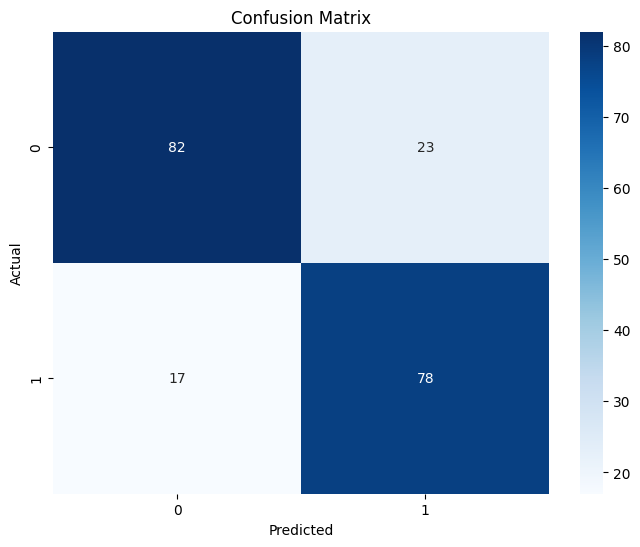

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a DataFrame for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first 20 rows
print("Comparison of Actual and Predicted values:")
display(results_df.head(20))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Xai interpretation with shap

### Subtask:
Use SHAP to interpret the model's predictions and visualize the results.


**Reasoning**:
Import the shap library, create a SHAP explainer, compute SHAP values, and generate a summary plot and a force plot as requested in the instructions.



SHAP Summary Plot:


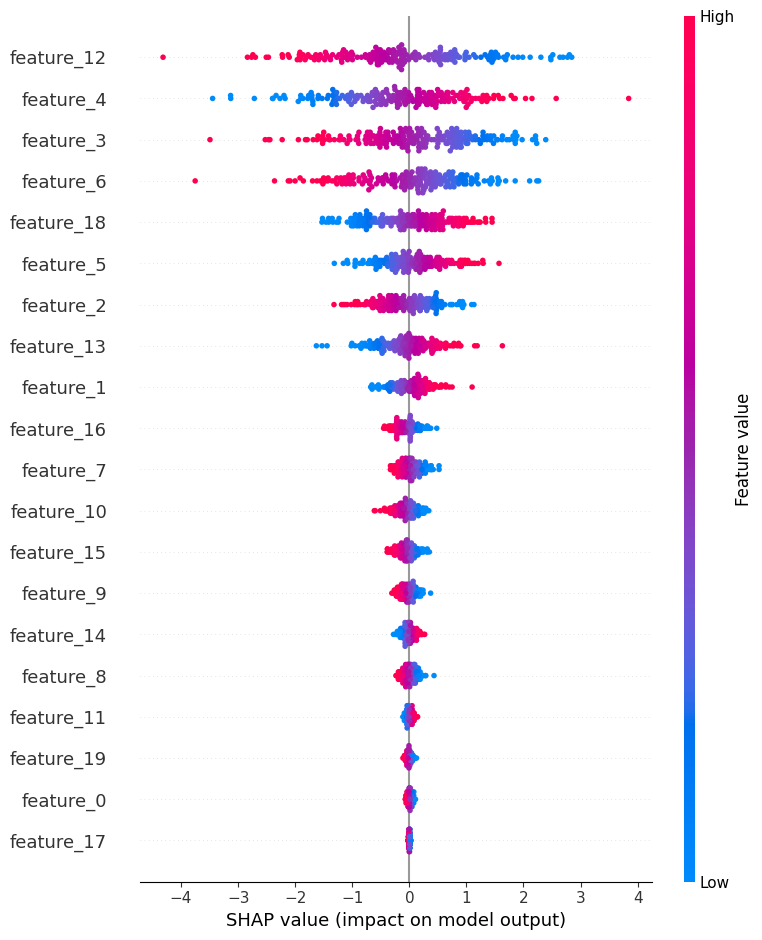


SHAP Force Plot for the first instance:


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [9]:
import shap

# 2. Create a SHAP explainer object
explainer = shap.Explainer(model, X_train)

# 3. Compute SHAP values for the test data
shap_values = explainer(X_test)

# 4. Generate a summary plot
print("SHAP Summary Plot:")
shap.summary_plot(shap_values, X_test)

# 5. Generate a force plot for a single prediction (first instance in X_test)
print("\nSHAP Force Plot for the first instance:")
shap.plots.force(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

**Reasoning**:
The force plot failed because the `shap.plots.force` function expects an Explanation object for the second argument, not just the raw SHAP values array. The `explainer` object directly produces an Explanation object when called with the test data. I will regenerate the force plot using the correct input format.



In [10]:
# 5. Generate a force plot for a single prediction (first instance in X_test)
print("\nSHAP Force Plot for the first instance:")
shap.plots.force(explainer.expected_value, shap_values[0], X_test.iloc[0,:])


SHAP Force Plot for the first instance:


ValueError: visualize() can only display Explanation objects (or arrays of them)!

**Reasoning**:
The error persists, indicating that the `shap.plots.force` function still doesn't recognize the input format. The `explainer(X_test)` call returns an Explanation object, and the force plot function is designed to take this object directly. I will pass the slice of the Explanation object corresponding to the first instance to `shap.plots.force`.



In [11]:
# 5. Generate a force plot for a single prediction (first instance in X_test)
print("\nSHAP Force Plot for the first instance:")
shap.plots.force(shap_values[0])


SHAP Force Plot for the first instance:


## Summary:

### Data Analysis Key Findings

*   The dataset is synthetic, generated using `make_classification`, containing 1000 samples and 20 features, along with a binary target variable.
*   The generated dataset has no missing values.
*   The target variable is relatively balanced, with 50.7% belonging to class 1 and 49.3% to class 0.
*   The data was successfully split into training (80%) and testing (20%) sets.
*   A Logistic Regression model was trained on the training data.
*   The trained model achieved an accuracy of 0.8000, precision of 0.7723, recall of 0.8211, and an F1 score of 0.7959 on the test data.
*   SHAP analysis provided insights into feature importance and how individual features contribute to specific predictions.

### Insights or Next Steps

*   The model performance metrics (Accuracy, Precision, Recall, F1 Score) provide a good baseline, but further optimization through hyperparameter tuning or trying different models could potentially improve performance.
*   The SHAP analysis provides valuable interpretability. Further investigation of the features identified as most important by SHAP could lead to a deeper understanding of the underlying patterns in the data and potentially inform feature engineering or domain-specific insights.
